## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
uniqueMiceCount = len(merge_data['Mouse ID'])

print(uniqueMiceCount)

1893


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_data = merge_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')
duplicate_data

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateFrame = merge_data[duplicate_data]
len(duplicateFrame )

5

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexnames = duplicateFrame.index

for index in indexnames:
    merge_data = merge_data.drop(index = index)


In [7]:
# Checking the number of mice in the clean DataFrame.
len(merge_data)

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drugRegimen_Groupedby  = merge_data.groupby("Drug Regimen")

meanSeries = drugRegimen_Groupedby['Tumor Volume (mm3)'].mean()
medianSeries = drugRegimen_Groupedby['Tumor Volume (mm3)'].median()
varianceSeries = drugRegimen_Groupedby['Tumor Volume (mm3)'].var()
stdvSeries = drugRegimen_Groupedby['Tumor Volume (mm3)'].std()
semSeries = drugRegimen_Groupedby['Tumor Volume (mm3)'].sem()

summaryStatSeries_df = pd.DataFrame({"Mean": meanSeries, "Median": medianSeries, "Variance": varianceSeries, "Standard Deviation": stdvSeries, 
                          "SEM": semSeries})
 
# This method is the most straighforward, creating multiple series and putting them all together at the end.

summaryStatSeries_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
 
summaryStatSingle_df = merge_data.groupby("Drug Regimen").agg(Mean =pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'), 
                                                          Median =pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='median'),
                                                          Variance =pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='var'),
                                                          Stdev =pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='std'),
                                                          SEM = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='sem') )


# This method is the most straighforward, creating multiple series and putting them all together at the end.

summaryStatSingle_df

# This method produces everything in a single groupby function


,Mean,Median,Variance,Stdev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

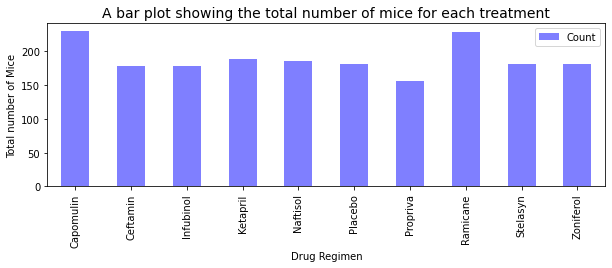

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
 
#get the count of mice for each regimen
regimenCountGroupBy = pd.DataFrame({"Count" : drugRegimen_Groupedby["Mouse ID"].count()})

#plot the graph
regimen_chart = regimenCountGroupBy.plot(kind='bar', figsize=(10,3), color="blue", alpha=0.5, fontsize=10);


#set the titles for the chart
regimen_chart.set_title("A bar plot showing the total number of mice for each treatment", fontsize=14)
regimen_chart.set_ylabel("Total number of Mice");

plt.show()
plt.tight_layout()

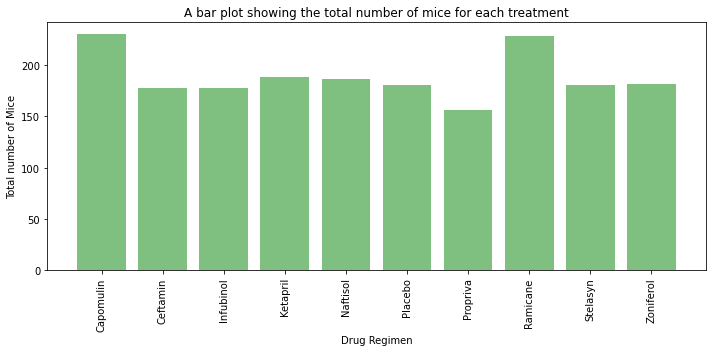

In [112]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#get the index of the group by to new series
drugRegimenDF = regimenCountGroupBy.index.tolist()

#get the values of the group by to new series
miceCountDF = regimenCountGroupBy["Count"].tolist()
x_axis = np.arange(len(miceCountDF))

#plot the graph using plt
plt.figure(figsize=(10,5))
plt.bar(x_axis, miceCountDF, color='g', alpha=0.5)
x = plt.xticks(x_axis, drugRegimenDF, rotation="vertical")


#set the x and y limits for the graph
plt.xlim(-0.75, len(regimenCountGroupBy))
plt.ylim(0, max(regimenCountGroupBy["Count"])+10)

# set the titles for the grpah 
plt.title("A bar plot showing the total number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Mice")

#display the graph
plt.tight_layout()
plt.show()

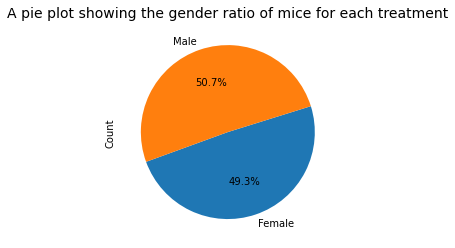

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexGroupBy = merge_data.groupby("Sex")

#get the count of mice for each regimen
sexCountGroupBy = pd.DataFrame({"Count" : sexGroupBy["Mouse ID"].count()})

#plot the graph
gender_chart = sexCountGroupBy.plot(kind='pie',y = "Count", shadow=False,startangle=200,  legend = False,autopct="%2.1f%%");


#set the titles for the chart
gender_chart.set_title("A pie plot showing the gender ratio of mice for each treatment", fontsize=14)
 

plt.show()
plt.tight_layout()

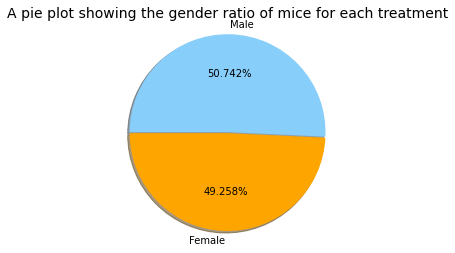

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = sexCountGroupBy.index.tolist()

# The values of each section of the pie chart
sizes = sexCountGroupBy["Count"].tolist()

# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]

# Tells matplotlib to seperate the different section from the others
explode = [0, 0.01]

#plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.3f%%", shadow=True, startangle=180)

plt.axis("equal")

#set title

plt.title("A pie plot showing the gender ratio of mice for each treatment", fontsize=14)

#display plot

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatmentRegimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatmentDF = merge_data[merge_data['Drug Regimen'].isin(treatmentRegimen)]

treatmentDF
# Start by getting the last (greatest) timepoint for each mouse
timePointMaxDF = treatmentDF[treatmentDF['Timepoint']==treatmentDF['Timepoint'].max()]

tumorMaxDF = pd.DataFrame({"TumorAtLastTimePoint" : treatmentDF.groupby("Drug Regimen")['Tumor Volume (mm3)'].max()})
tumorMaxDF
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatmentDFMerge = pd.merge(treatmentDF, tumorMaxDF, on='Drug Regimen') 

treatmentDFMerge


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,TumorAtLastTimePoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,47.622816
1,k403,Ramicane,Male,21,16,5,38.825898,0,47.622816
2,k403,Ramicane,Male,21,16,10,35.014271,1,47.622816
3,k403,Ramicane,Male,21,16,15,34.223992,1,47.622816
4,k403,Ramicane,Male,21,16,20,32.997729,1,47.622816
...,...,...,...,...,...,...,...,...,...
809,y865,Ceftamin,Male,23,26,25,57.173538,2,68.923185
810,y865,Ceftamin,Male,23,26,30,59.033275,3,68.923185
811,y865,Ceftamin,Male,23,26,35,61.153140,3,68.923185
812,y865,Ceftamin,Male,23,26,40,63.469549,3,68.923185


In [24]:
# Put treatments into a list for for loop (and later for plot labels)

treatmentRegimenDF = treatmentDFMerge[['Drug Regimen','Tumor Volume (mm3)']]

# Create empty list to fill with tumor vol data (for plotting)

tumorValData  = treatmentDFMerge['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quantiles = tumorValData.quantile([.25,.5,.75])
quantiles

Q1 = quantiles[0.25]
Q3 = quantiles[0.75]
iqr = Q3 - Q1

    
# Locate the rows which contain mice on each drug and get the tumor volumes
lower_bound = Q1 - (1.5*iqr)
upper_bound = Q3 + (1.5*iqr)

# add subset 
    
    
# Determine outliers using upper and lower bounds
outliers = treatmentRegimenDF.loc[(tumorValData < lower_bound) | (tumorValData > upper_bound)]
outliers

,Drug Regimen,Tumor Volume (mm3)
8,Ramicane,24.365505
9,Ramicane,22.050126
237,Capomulin,23.343598
467,Infubinol,67.973419
494,Infubinol,66.083066
502,Infubinol,67.821420
503,Infubinol,69.428141
504,Infubinol,72.226731
542,Infubinol,67.289621
552,Infubinol,66.196912


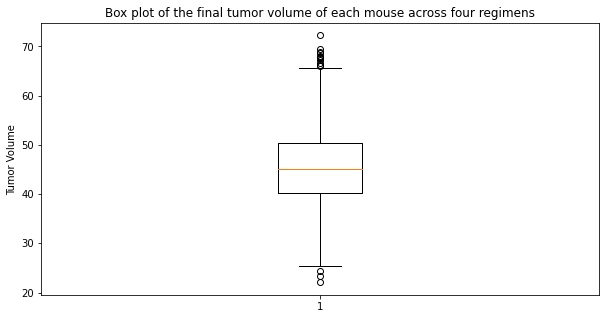

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

 
plt.figure(figsize=(10,5))
plt.title('Box plot of the final tumor volume of each mouse across four regimens')
plt.ylabel('Tumor Volume')
plt.boxplot (tumorValData)
plt.show()

## Line and Scatter Plots

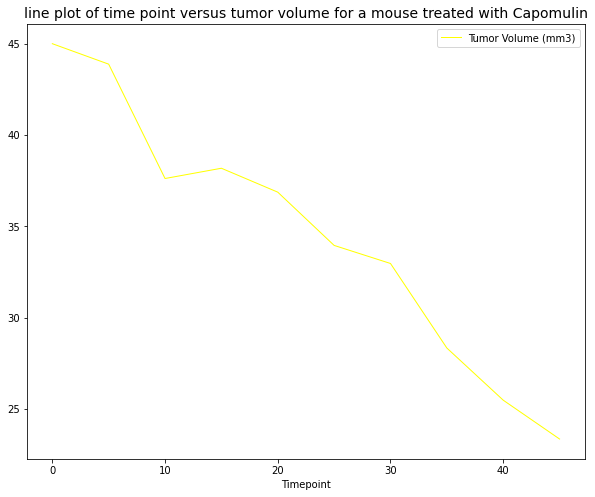

<Figure size 432x288 with 0 Axes>

In [83]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulinDF = merge_data.loc[((merge_data["Drug Regimen"] == "Capomulin") & (merge_data["Mouse ID"] == "s185")),["Timepoint", "Tumor Volume (mm3)"]]
capomulinDF

capomulinDF = capomulinDF.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulinDF = capomulinDF.set_index('Timepoint')
 
linechart = capomulinDF.plot(figsize=(10, 8), linewidth=1, color='yellow')


#set the titles for the chart
linechart.set_title("line plot of time point versus tumor volume for a mouse treated with Capomulin", fontsize=14)


plt.show()
plt.tight_layout()



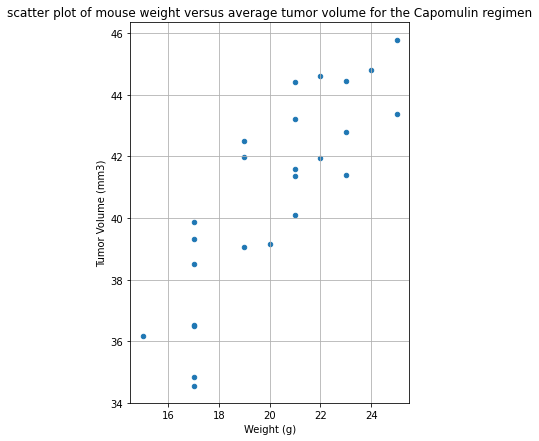

In [98]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulinScatterDF = merge_data.loc[((merge_data["Drug Regimen"] == "Capomulin")),["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulinScatterDF

#group by mouseId, weight and reset the index to make it an array
campGroupBy = pd.DataFrame(capomulinScatterDF.groupby(["Mouse ID", "Weight (g)"])['Tumor Volume (mm3)'].mean()).reset_index()

#remove the index
campGroupBy.index.name = None


campGroupBy.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",
              title="scatter plot of mouse weight versus average tumor volume for the Capomulin regimen", grid=True, figsize=(5,7))
plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
